In [2]:
'목적이 무엇인가'

데이터 - 보스턴 주택 가격
: 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리함


SyntaxError: invalid syntax (<ipython-input-2-a6569aa11723>, line 3)

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_raw = pd.read_csv("BOSTON_HOUSING.csv")

In [5]:
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [6]:
np.shape(df_raw)
# 좀 적어보이는데 k-fold 사용?

(506, 14)

In [8]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [9]:
# CHAS :: Charlse River Dummy variable
# INDUS : Proportion of non-retail business acres per town.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_raw.items():
    b = sns.boxplot(y=k, data=df_raw, ax=axs[index])
    b.set_xlabel(k, fontsize=12)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# medv 50,000달러가 맥시멈?
# ZN/CRIM의 mean값과 max값의 차이가 매우 큼
# TAX 10,000달러당 재산세율? 
# B 계산 후 <-> 계산전 (계산을 하면서 각각 값들의 차이가 작아짐.) 
# RAD 방사형 도로까지의 접근성 지수 : max 값과 75% 이상 값이 동일하다.

# 전처리가 필요할 것 같은 데이터는?
# 홀쭉한 애들: CRIM, ZN, B, RM 
# 뚱뚱한 애들: RAD, TAX
# 보통인데 뭔가 이상치 많아 보이는 애들: DIS, LSTAT

df_thin = df_raw[["MEDV", "CRIM", "ZN", "B", "RM"]]
df_fat = df_raw[["MEDV", "RAD", "TAX"]]
df_odd = df_raw[["MEDV", "DIS", "LSTAT"]]

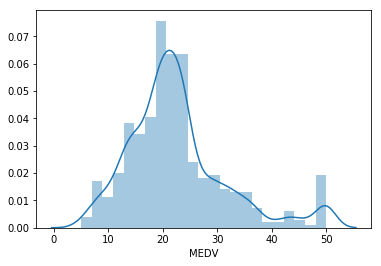

In [11]:
sns.distplot(df_raw["MEDV"])

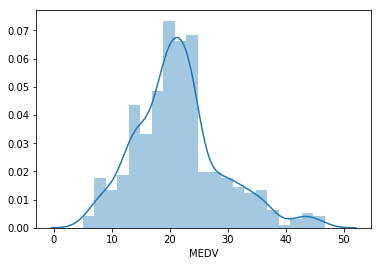

In [12]:
df_raw_medv = df_raw[df_raw["MEDV"] < 48]
sns.distplot(df_raw_medv["MEDV"])

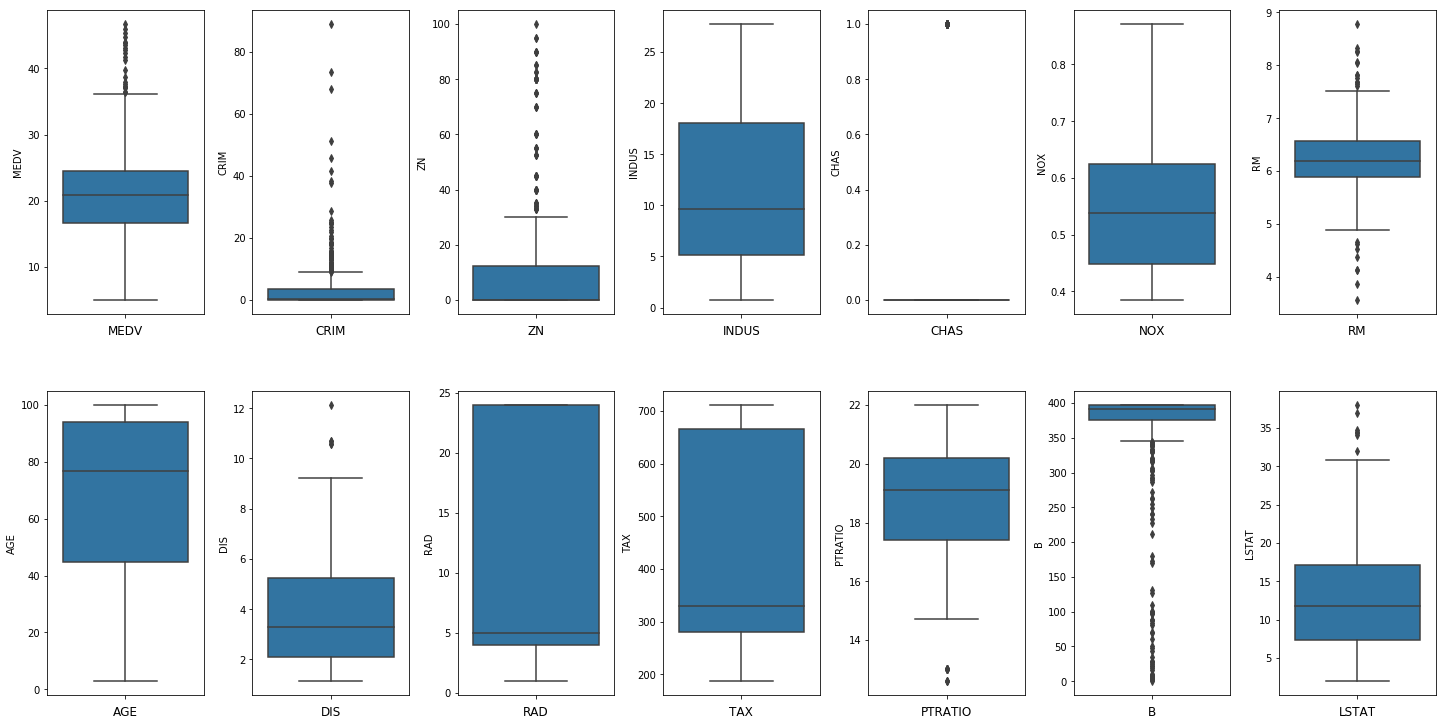

In [13]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_raw_medv.items():
    b = sns.boxplot(y=k, data=df_raw_medv, ax=axs[index])
    b.set_xlabel(k, fontsize=12)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [16]:
for k, v in df_raw.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_raw)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column MEDV outliers = 7.91%
Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%


In [17]:
for k, v in df_raw_medv.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_raw_medv)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column MEDV outliers = 4.31%
Column CRIM outliers = 13.35%
Column ZN outliers = 13.14%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.31%
Column AGE outliers = 0.00%
Column DIS outliers = 1.03%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.46%
Column B outliers = 15.81%
Column LSTAT outliers = 1.44%


In [19]:
df_thin = df_raw[["MEDV", "CRIM", "ZN", "B", "RM"]]
df_fat = df_raw[["MEDV", "RAD", "TAX"]]
df_odd = df_raw[["MEDV", "DIS", "LSTAT"]]

df_thin2 = df_raw_medv[["MEDV", "CRIM", "ZN", "B", "RM"]]
df_fat2 = df_raw_medv[["MEDV", "RAD", "TAX"]]
df_odd2 = df_raw_medv[["MEDV", "DIS", "LSTAT"]]

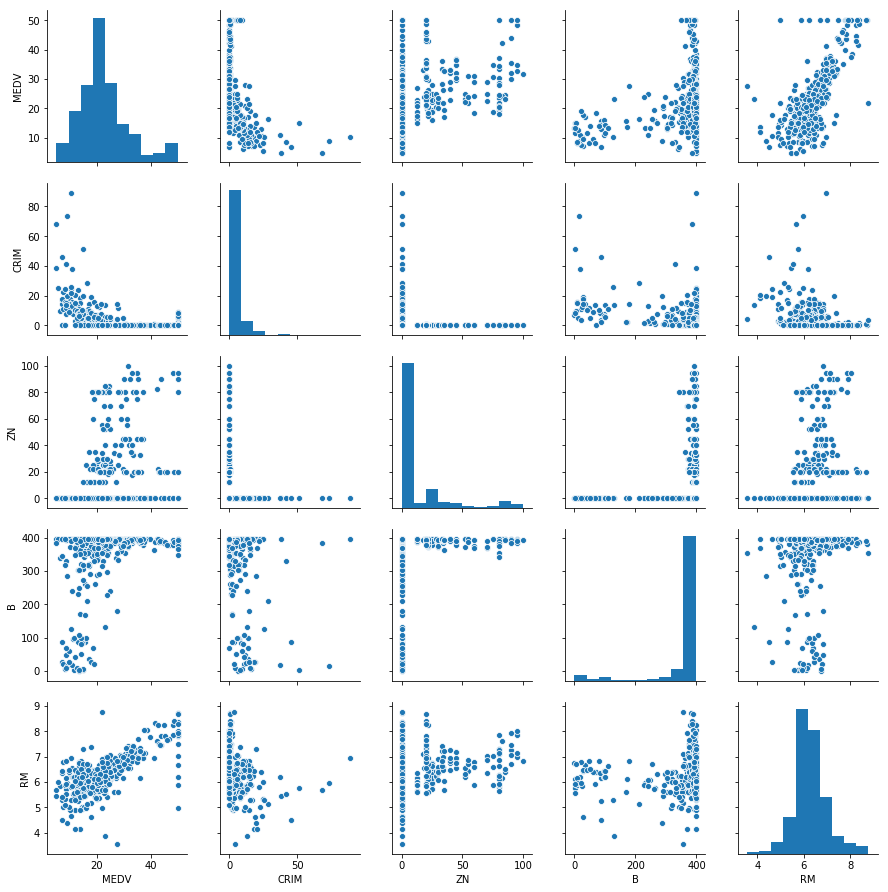

In [20]:
sns.pairplot(df_thin)

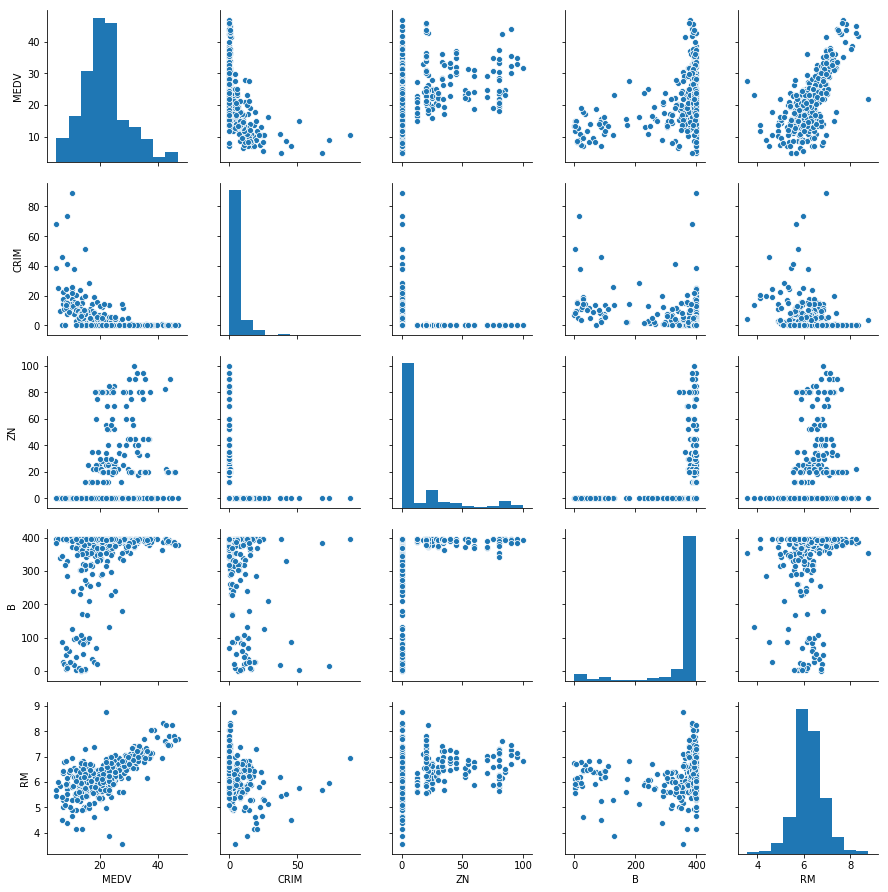

In [21]:
sns.pairplot(df_thin2)

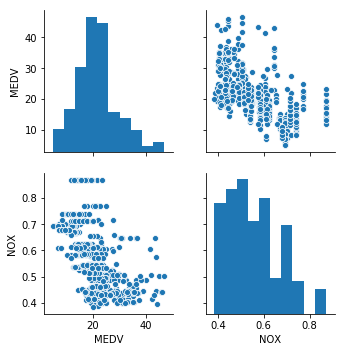

In [22]:
sns.pairplot(df_raw_medv, vars=["MEDV", "NOX"])

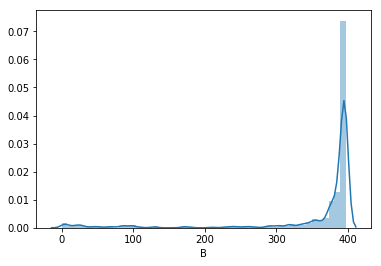

In [23]:
sns.distplot(df_raw_medv["B"])

In [24]:
df_raw.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [25]:
df_raw_medv.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.459099,0.399635,-0.602902,0.083166,-0.539971,0.666680,-0.510442,0.384847,-0.485107,-0.576997,-0.507549,0.371804,-0.766328
CRIM,-0.459099,1.000000,-0.198981,0.407171,-0.064846,0.420876,-0.218482,0.354331,-0.382854,0.627115,0.583322,0.286402,-0.383986,0.461166
ZN,0.399635,-0.198981,1.000000,-0.526899,-0.052834,-0.512743,0.304931,-0.563748,0.679512,-0.307319,-0.299538,-0.375958,0.175665,-0.420681
INDUS,-0.602902,0.407171,-0.526899,1.000000,0.034385,0.767463,-0.406957,0.640229,-0.713422,0.595492,0.716163,0.381962,-0.362588,0.634059
CHAS,0.083166,-0.064846,-0.052834,0.034385,1.000000,0.085418,0.050934,0.071193,-0.077902,-0.033502,-0.069235,-0.120705,0.042237,-0.008351
NOX,-0.539971,0.420876,-0.512743,0.767463,0.085418,1.000000,-0.329185,0.726673,-0.767977,0.613141,0.668695,0.190257,-0.383449,0.613934
RM,0.666680,-0.218482,0.304931,-0.406957,0.050934,-0.329185,1.000000,-0.276411,0.255459,-0.193375,-0.274987,-0.273412,0.116582,-0.608432
AGE,-0.510442,0.354331,-0.563748,0.640229,0.071193,0.726673,-0.276411,1.000000,-0.742639,0.452586,0.500754,0.271870,-0.279323,0.640724
DIS,0.384847,-0.382854,0.679512,-0.713422,-0.077902,-0.767977,0.255459,-0.742639,1.000000,-0.492713,-0.533814,-0.251473,0.299860,-0.539465
RAD,-0.485107,0.627115,-0.307319,0.595492,-0.033502,0.613141,-0.193375,0.452586,-0.492713,1.000000,0.909244,0.455915,-0.451047,0.509594


In [26]:
df_raw_medv["ZN"].value_counts()

0.0      360
20.0      18
80.0      14
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
21.0       4
90.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
95.0       2
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [28]:
df_raw_medv

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


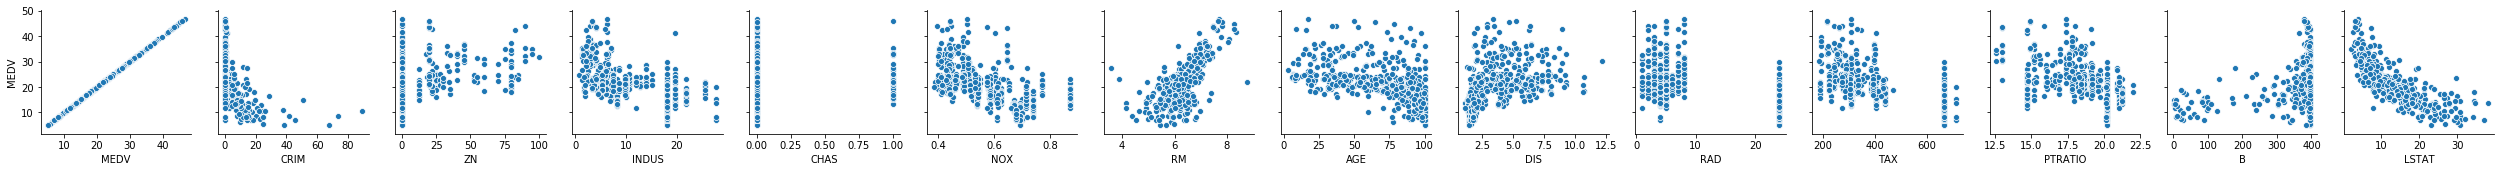

In [36]:
sns.pairplot(df_raw_medv, y_vars="MEDV", x_vars=list(df_raw_medv))

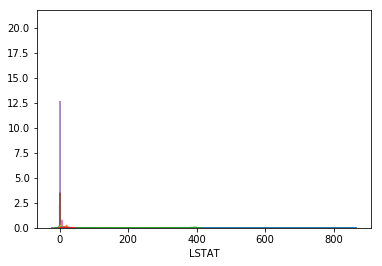

In [51]:
for i in df_raw_medv:
    sns.distplot(df_raw_medv[i])
